### Import Tensorflow

In [3]:
#!pip install matplotlib

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
import matplotlib
matplotlib.__version__

'3.9.2'

In [6]:
tf.__version__

'2.17.0'

# Check for GPU

In [7]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
#physical_devices
print("Num GPUs Available: ", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  0


# Load Dataset

In [8]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 202s 1us/step


## Show some sample images of data set with corresponding labels.


Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


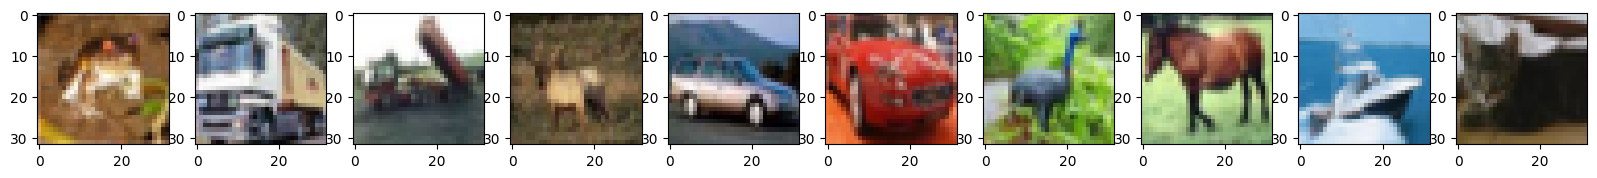

In [9]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:10]])) 
print('Corresponding classes for the labels: ' + str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig, axarr = plt.subplots(1, 10)
fig.set_size_inches(20, 6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()

In [10]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

## Preparing the dataset
Normalize the input data

In [11]:
X_train = x_train / 255.0
X_test = x_test / 255.0
# Every Neuron is expected to have value from 0 to 1 to converge quickly(Gradient Descent)

# MLP Network

* I/p Layer - Flatten
* Hidden layer - 2048, AF = 'RELU'
* O/p Layer - 10 , AF-Softmax

In [12]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten

In [13]:
ann = keras.Sequential()
ann.add(Flatten(input_shape=(32,32,3)))
ann.add(Dense(2048,activation='relu'))
ann.add(Dense(10,activation='softmax'))

c:\Users\nhpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │     6,293,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,313,994 (24.09 MB)

 Trainable params: 6,313,994 (24.09 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
ann.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history = ann.fit(X_train ,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 178s 111ms/step - accuracy: 0.2899 - loss: 2.2210 - val_accuracy: 0.3664 - val_loss: 1.7360
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 170s 109ms/step - accuracy: 0.3908 - loss: 1.7041 - val_accuracy: 0.4180 - val_loss: 1.6325
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 162s 104ms/step - accuracy: 0.4228 - loss: 1.6214 - val_accuracy: 0.4303 - val_loss: 1.5916
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 161s 103ms/step - accuracy: 0.4381 - loss: 1.5646 - val_accuracy: 0.4471 - val_loss: 1.5565
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 165s 106ms/step - accuracy: 0.4534 - loss: 1.5417 - val_accuracy: 0.4356 - val_loss: 1.5747
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 157s 100ms/step - accuracy: 0.4666 - loss: 1.5081 - val_accuracy: 0.4538 - val_loss: 1.5375
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 157s 100ms/step - accuracy: 0.4701 - loss: 1.4902 - val_accuracy: 0.4518 - val_loss: 1.5530
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 158s 101ms/step - ac

#### With the below simple function we will be able to plot our training history.

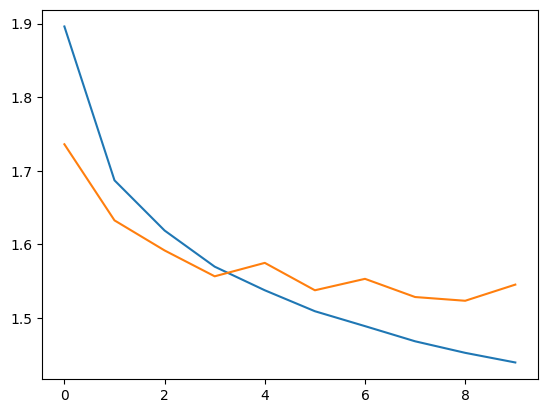

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## CNN Model

In [18]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

In [19]:
cnn = keras.Sequential()
cnn.add(Conv2D(32, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(128, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(256, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(10,activation='softmax'))

c:\Users\nhpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 454,666 (1.73 MB)

 Trainable params: 454,666 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = cnn.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.3205 - loss: 1.8228 - val_accuracy: 0.5354 - val_loss: 1.2544
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.5777 - loss: 1.1873 - val_accuracy: 0.6470 - val_loss: 1.0054
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.6708 - loss: 0.9539 - val_accuracy: 0.6999 - val_loss: 0.8625
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.7226 - loss: 0.8022 - val_accuracy: 0.7262 - val_loss: 0.8193
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.7609 - loss: 0.7036 - val_accuracy: 0.7197 - val_loss: 0.8266
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7908 - loss: 0.6110 - val_accuracy: 0.7345 - val_loss: 0.8056
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.8200 - loss: 0.5217 - val_accuracy: 0.7434 - val_loss: 0.7789
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.8348 

In [22]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

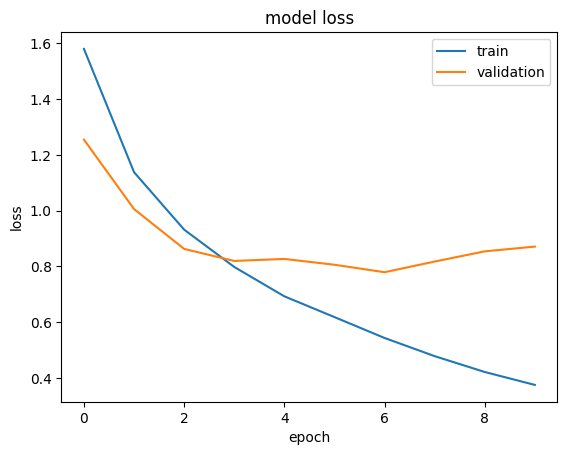

In [23]:
plotLosses(history)

In [24]:
def plotAccuracy(history):  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

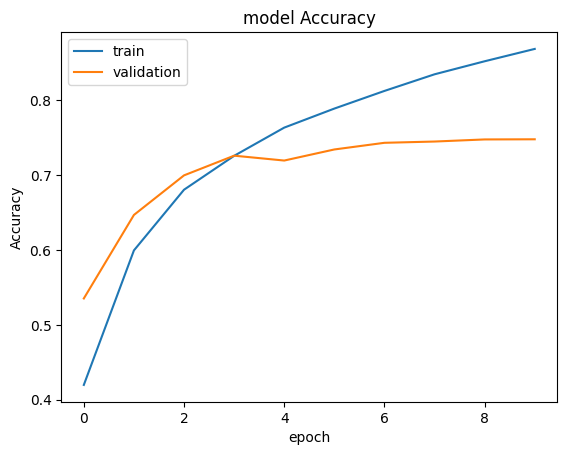

In [25]:
plotAccuracy(history)

In [26]:
from keras.models import load_model
cnn.save('model111.h5')

In [27]:
# Load the model
model = tf.keras.models.load_model('model111.h5')

In [28]:
import numpy as np
# Add a batch dimension to the input
x_test_sample = np.expand_dims(x_test[20], axis=0)

# Now pass it to the model for prediction
model.predict(x_test_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

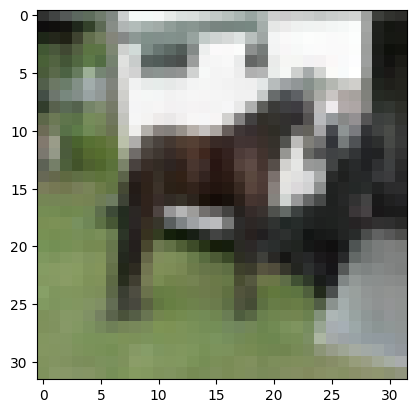

In [29]:
plt.imshow(x_test[20])

In [30]:
# Example: if you have class names like this
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  # replace with your actual class names

# Get the prediction probabilities
predictions = model.predict(x_test_sample)

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(predictions)

# Get the corresponding class name
predicted_class_name = class_names[predicted_class_index]

print(f"The predicted class is: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
The predicted class is: truck
